# 2.2 - Intermediate - Working with Stargazer

COMET Team <br> *Jane Platt, Alex Haddon, Jonathan Graves*  
2025-01-29

## Outline

## Introduction

One crucial part of any research project is presenting the results to
others in ways that are accessible and easy to understand. This notebook
will go over how to use *stargazer*, which is a convenient package built
for R that allows us to present the results of regressions in simple,
well-formatted tables using very little code.

For the purposes of this notebook, we’ll be using data from another
module [the example project for
ECON326](https://comet.arts.ubc.ca/docs/6_Projects/projects_example_project_econ326/Projects_Example_Project_ECON326.html).
We suggest taking a look at this before getting started if you’d like
more information on where the data came from and how it was cleaned!

Let’s get started by importing all of the packages that we will use
through out this module!

In [ ]:
# If any of the packages happened to not be installed for you, use the command install.packages() with the name of the packages, like 'stargazer'

library(ggplot2) 
library(haven)
library(stargazer)
library(tidyverse)
library(sandwich)
source("intermediate_stargazer_tests.r")

## Note

Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary
Statistics Tables. R package version 5.2.3.
https://CRAN.R-project.org/package=stargazer

## Development and the Planet

For this module, we will be continuing with the project started in [the
example project for
ECON326](https://comet.arts.ubc.ca/docs/6_Projects/projects_example_project_econ326/Projects_Example_Project_ECON326.html).
This project studied the connection between the production of \[$CO_2$\]
and GDP in Canada.

As the [Government of Canada declared a national climate
emergency](https://globalnews.ca/news/5401586/canada-national-climate-emergency/),
the greenhouse gas carbon dioxide \[$CO_2$\] has gotten a lot of
attention. While there are many other gasses that contribute to to the
atmospheric greenhouse effect, \[$CO_2$\] is one of the most immediate
concerns because of its role in industrialization and energy use. In
general, a rising GDP is a desirable outcome, but we might wonder
whether all other outcomes associated with a higher GDP are
advantageous. What are the implications of assuming that there can
infinite GDP growth when it’s connected to finite measures such as the
amount of \[$CO_2$\] that can be sustainably produced and recaptured? Is
this just a reflection of what our current energy sources and technology
allow, or is there more to the story in how we think about economic
growth in general?

## Summary Statistics

It is really important to first create a summary of the data which we
can do using the `stargazer` package. Before doing so, we want to import
and clean the data which was done in a separate notebook you can look at
here: [the example project for
ECON326](https://comet.arts.ubc.ca/docs/6_Projects/projects_example_project_econ326/Projects_Example_Project_ECON326.html).
Now we can use the commmand `stargazer(<your data frame here>)` to get
summary statistics for your dataset.

> *Note*: Below we used `as.data.frame(<your data frame here>)` to
> covert the data frame into a readable format for `stargazer`. Your
> table won’t look right unless you do this!

In [ ]:
#First we will import the data
raw_co2_df <- as.data.frame(read_csv("../datasets_projects/CO2_data.csv"))

#Second, we will select the variables we need for analysis
co2_df <- select(raw_co2_df, c("province", "CO2", "GDP", "electricity", "population"))

We can easily create a table of summary statistics using the `stargazer`
package. All we need to do is run the commang `stargazer(data)`. Try it
below!

In [ ]:
summary1 <- stargazer(co2_df)

This looks weird - that is because `stargazer`’s default output is in
LaTex form. If you are using LaTex, you can copy the output below
directly into your file. However, if you are using other software, it
will be easier to output your table in text form. To do so, we can
specify that we want the `type = "text"`. Try this below!

In [ ]:
summary2 <- stargazer(co2_df, type = "text")

It’s starting to look pretty good! However, we’re missing some things.
Currently, our table has no title. We’ll want to fix this. This is easy
using the `stargazer` command. We just need to specify
`title = "Whatever you Want!"`. See below:

In [ ]:
summary3 <- stargazer(co2_df, type = "text", title = "Descriptive Statstics")

In professional academic papers, we will want to make sure our tables
are capable of standing alone. This means that anyone who looks at your
table should be able to read it and understand it without having read
any parts of your paper. Some things that make this easier include
labelling your variables properly: using full words and not
abbreviations, capitalizing, and including units. Let’s relable the
variables that we’re using for this analysis by including the option
`covariate.labels = c("Variable name 1", "Variable name 2", "Variable name 3", ...)`.

In [ ]:
summary4 <- stargazer(co2_df, type = "text", title = "Descriptive Statistics", covariate.labels = c("CO2 (kt)", "GDP (millions of dollars)", "Electricty (MWh)", "Population"))

Our table is looking good, but we have a lot of trailing zeroes. This
will make our table harder to read, as it can be clunky and add
unnecessary digits. To fix this, we can specify how many digits after
the decimal we want. Let’s say we want one digit after the decimal: just
include `digits = 1`!

In [ ]:
summary5 <- stargazer(co2_df, type = "text", title = "Descriptive Statistics", digits = 1, covariate.labels = c("CO2 (kt)", "GDP (millions of dollars)", "Electricty (MWh)", "Population"))

The last thing we’ll want to do is export this table to our local
folder. This will make it easier to keep track of everything we’re
working on, and save our work for later. This can be done by adding the
option `out = "filename.tex"` to the `stargazer` command. If you are
using LaTex, you will want to select the option `type = "latex"` and
ensure that the output ends in `.tex`. The file will save to your
working directory.

In [ ]:
summary6 <- stargazer(co2_df, type = "text", title = "Descriptive Statistics", digits = 1, covariate.labels = c("CO2 (kt)", "GDP (millions of dollars)", "Electricty (MWh)", "Population"), out = "descriptive")

## Regression Tables

The biggest advantage of the `stargazer` package is it’s ability to make
great regression tables with very simple code. The syntax to make
regression tables is identical to that of summary statistics tables,
with a few additional options. We’ll go over these shortly.

Before we make the tables, we need to run some regressions and save
these models. As before, we’re going to follow what was done in the
Example Project for ECON326.

Let’s start with the simple regressions from the project to demonstrate
the basics of `stargazer`’s regression tables.

In [ ]:
slr_1 <- lm(CO2 ~ GDP, data = co2_df)
slr_2 <- lm(CO2 ~ electricity, data = co2_df)
slr_3 <- lm(CO2 ~ population, data = co2_df)
mlr_1 <- lm(CO2 ~ GDP + electricity + population, data = co2_df)

To make a regression table using `stargazer`, we follow similar syntax
as before. Rather than specifying a dataframe as our input, we will use
our models. As before, we can export in text format, include a title,
round the results, and rename the variables. The final command will look
like
`stargazer(model1, model2, model3, type = "text", title = "Your Title", digits = #, covariate.labels = c("Variable Name 1", "Variable Name 2")), out = "filename"`.
Let’s try this with the models we ran above.

In [ ]:
stargazer(slr_1, slr_2, slr_3, mlr_1, 
  type = "text", title = "Results", 
  digits = 1, 
  covariate.labels = c("GDP (millions of dollars)", "Electricty (MWh)", "Population"), 
  out = "results_1")

As you can see, `stargazer` does a lot! This simple command has not only
included our regression results in a clean and easily-readable table,
but it has also included stars for statistically significant
coefficients, the number of observations, the $R^2$ value, and more.

Let’s now discuss some formatting adjustments that `stargazer` can do to
clean up our regression tables even more.

1.  We can remove empty lines from our table to make it more succinct by
    using the option `no_space`. All we need to do is add
    `no_space = TRUE` at the end of the command.
2.  We can label our dependent variable. Just like with covariates, we
    just need to include `dep.var.labels = c("Variable Name")` in the
    command.
3.  We can omit some statistics that may not be relevant for our paper.
    To do so, we just include the option
    `omit.stat = c("statistic 1", "statistic 2")`.

-   The opposite of this option is
    `keep.stat = c("statistic 1", "statistic 2")`, where we would list
    out the statistics we want to keep. This can be useful if, for
    example, you only want to keep one statistic.
-   Some of the names for the statistics are abbreviated differently
    than what appears in the summary of the model. You can find a list
    of the codes that `stargazer` uses for statistics
    [here](https://www.rdocumentation.org/packages/stargazer/versions/5.2.3/topics/stargazer_stat_code_list).

1.  We can align the coefficients in each column using the option
    `align = TRUE`.
2.  We can place the standard errors in line with the point estimates by
    including the option `single.row = TRUE`.
3.  We can reorder the explanatory variables using the option `order`.
    All that’s needed is to write out
    `order = c("Variable 1", "Variable 2")` with the variables in the
    order that you’d like.

-   Be sure to adjust `covariate.labels` to reflect the new order you
    specified!

Putting it all together, we get:

In [ ]:
stargazer(slr_1, slr_2, slr_3, mlr_1, 
  type = "text", 
  title = "Results", 
  digits = 1, 
  covariate.labels = c("GDP (millions of dollars)", "Population", "Electricty (MWh)"), 
  order = c("GDP", "population", "electricity"), #reordering the variables to have GDP first, population second, and electricity third
  nospace = TRUE,
  dep.var.labels = c("CO2"),
  omit.stat = c("ser"), # residual standard error
  align = TRUE,
  single.row = TRUE,
  out = "results_2")

You don’t necessarily want to include all of these options in every one
of your tables. For example, standard economics papers place the
standard errors below the point estimates, so you wouldn’t need to
include `single.row = TRUE`. It’s up to you to see what works best to
present your results in meaningful ways that will engage the reader!

Another thing we can do using `stargazer` is include confidence
intervals instead of standard errors. This can be useful if, for
example, you want to discuss the upper and lower bounds of your
estimates, or if you want to show that your point estimates are very far
from zero. To do so, we include the options `ci = TRUE` and
`ci.level = value` where `value` is the confidence interval in decimal
value (typically this would be 0.90 or 0.95).

In [ ]:
stargazer(slr_1, slr_2, slr_3, mlr_1, 
  type = "text", 
  title = "Results", 
  digits = 1, 
  covariate.labels = c("GDP (millions of dollars)", "Electricty (MWh)", "Population"), 
  nospace = TRUE,
  dep.var.labels = c("CO2"),
  omit.stat = c("ser"), # residual standard error
  align = TRUE,
  ci = TRUE,
  ci.level = 0.95,
  out = "results_3")

The last thing we’ll go over is how to include special standard errors
in your tables.

Remember that homoskedasticity, or constant variance, is an underlying
assumption of OLS. Knowing that heteroskedasticity is another common
issue in regression, we usually want to run our regressions with
heteroskedasticity-robust standard errors. To do so, we use the
`sandwich` package (more details about this can be found in the [Example
Project
Module](https://comet.arts.ubc.ca/docs/6_Projects/projects_example_project_econ326/Projects_Example_Project_ECON326.html)).

In [ ]:
# The initial regression that we ran
mlr_1 <- lm(CO2 ~ gdp + population + electricity, data = CO2_data)

# Obtain robust standard errors
robust_se <- sqrt(diag(vcovHC(mlr_1, type = "HC1")))  # "HC1" is one of the robust variance estimators

We’ll use `stargazer` to make a table that has two columns, one that has
our point estimates with the original standard errors, and another that
includes our point estimates with original standard errors (both using
the multiple regression model).

To specify the standard errors we’d like to use, we can add the option
`se = list(SE_1, SE_2)` to our original command. Our default standard
errors are called `NULL` and our robust ones are `robust_se`, so we will
specify those in our command.

It might also be useful in this case to include column labels so that
readers know what the difference between our two columns represent.
We’ll do so by specifying `column.labels = c("column 1", "column 2")`.

In [ ]:
stargazer(mlr_1, mlr_1, # you need to specify the model twice so that R makes two columns, one for default SEs and one for robust SEs
  type = "text", 
  title = "Results", 
  digits = 1, 
  se = list(NULL, robust_se),
  column.labels = c("Default", "Robust"),
  covariate.labels = c("GDP (millions of dollars)", "Electricty (MWh)", "Population"), 
  dep.var.labels = c("CO2"),
  keep.stat = c("n","rsq"), # residual standard error
  align = TRUE,
  out = "results_5")

And there you have it! We can now make simple, neat, and accessible
tables in R using `stargazer`’s many options. Try it out for yourself
using your own data to see which options work best for your project!

## Exercises

Try the exercises below to test your abilities. We’ve created three
different tables using `stargazer`. Try to replicate them to the best of
your abilities! We’ve included the code used to make the tables below
for you to check your work.

### Exercise 1

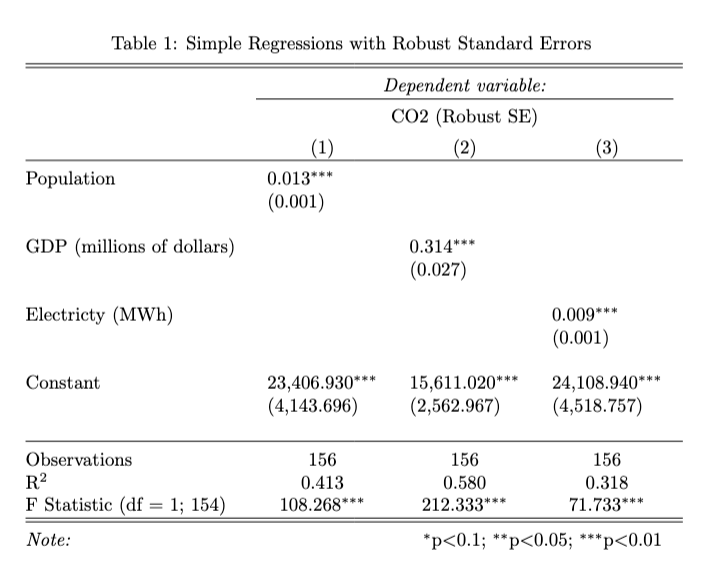

In [ ]:
model_1 <- lm(... ~ ..., data = ...)
robust_se_1 <- sqrt(diag(vcovHC(..., type = "...")))  
model_2 <- lm(... ~ ..., data = ...)
robust_se_2 <- sqrt(diag(vcovHC(..., type = "..."))) 
model_3 <- lm(... ~ ..., data = ...) 
robust_se_3 <- sqrt(diag(vcovHC(..., type = "..."))) 
# uncommment the options that belong in this table
table_1 <- stargazer(..., ..., ..., 
  type = "text",
  #title = "...", 
  #digits = ..., 
  #covariate.labels = c("..."), 
  #dep.var.labels = c("..."),
  #column.labels = c("...")
  #se = list(...),
  #ci = ...,
  #ci.level = ...,
  #keep.stat = c(...), 
  #omit.stat = c(...), 
  #align = ...,
  #single.row = ...,
  #nospace = ...
  )

test_1()

### Exercise 2

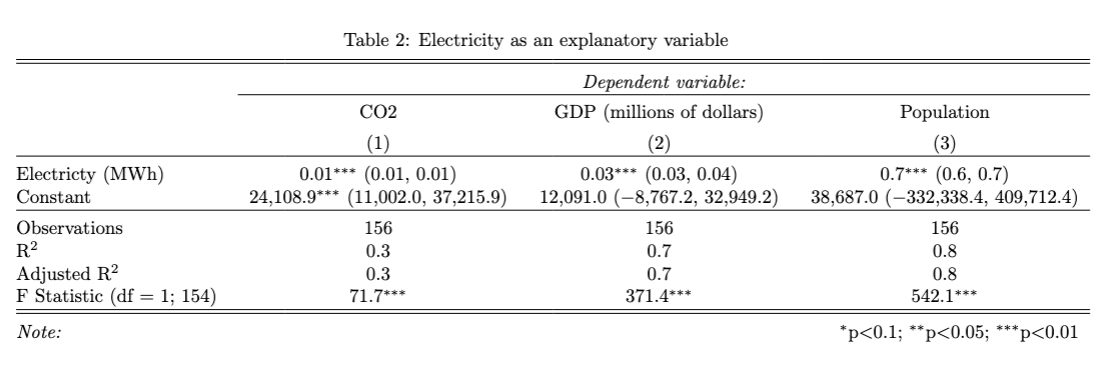

In [ ]:
model_4 <- lm(... ~ ..., data = ...)
model_5 <- lm(... ~ ..., data = ...)
model_6 <- lm(... ~ ..., data = ...)
# uncommment the options that belong in this table
table_2 <- stargazer(..., ..., ...,
  type = text,
  #title = "...", 
  #digits = ..., 
  #covariate.labels = c("..."), 
  #dep.var.labels = c("..."),
  #column.labels = c("...")
  #se = list(...),
  #ci = ...,
  #ci.level = ...,
  #keep.stat = c(...), 
  #omit.stat = c(...), 
  #align = ...,
  #single.row = ...,
  #nospace = ...
  )

test_2()

### Exercise 3

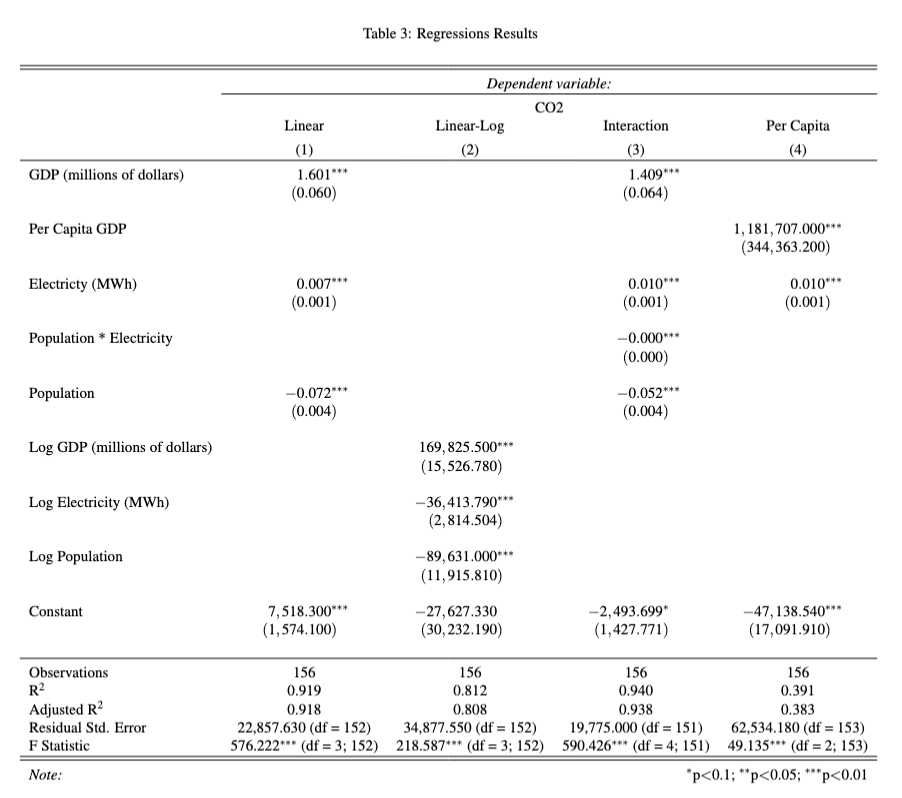

In [ ]:
model_6 <- lm(... ~ ..., data = ...)
robust_se_6 <- sqrt(diag(vcovHC(..., type = "..."))) 
#we might need new variables for this table...
co2_df <- co2_df %>%
  mutate(ln_gdp = ...) %>%
  mutate(ln_electricity = ...) %>%
  mutate(ln_pop = ...)
model_7 <- lm(... ~ ..., data = ...) 
robust_se_7 <- sqrt(diag(vcovHC(..., type = "..."))) 
model_8 <- lm(... ~ ..., data = ...)
robust_se_8 <- sqrt(diag(vcovHC(..., type = "..."))) 
#more new variables??
co2_df <- co2_df %>%
  mutate(per_capita_gdp = ...) 
model_9 <- lm(... ~ ..., data = ...)
robust_se_9 <- sqrt(diag(vcovHC(..., type = "HC1"))) 

table_3 <- stargazer(..., ..., ..., ..., 
  type = "text", 
  #title = "...", 
  #digits = ..., 
  #covariate.labels = c("..."), 
  #dep.var.labels = c("..."),
  #column.labels = c("...")
  #se = list(...),
  #ci = ...,
  #ci.level = ...,
  #keep.stat = c(...), 
  #omit.stat = c(...), 
  #align = ...,
  #single.row = ...,
  #nospace = ...
  )

test_3()

## ANSWERS

#### Exercise 1

In [ ]:
model_1 <- lm(CO2 ~ population, data = co2_df)
robust_se_1 <- sqrt(diag(vcovHC(model_1, type = "HC1")))  
model_2 <- lm(CO2 ~ GDP, data = co2_df)
robust_se_2 <- sqrt(diag(vcovHC(model_2, type = "HC1"))) 
model_3 <- lm(CO2 ~ electricity, data = co2_df) 
robust_se_3 <- sqrt(diag(vcovHC(model_3, type = "HC1"))) 

table_1 <- stargazer(model_1, model_2, model_3, 
  type = "text",
  title = "Simple Regressions with Robust Standard Errors", 
  digits = 3, 
  covariate.labels = c("Population", "GDP (millions of dollars)", "Electricty (MWh)"), 
  dep.var.labels = c("CO2 (Robust SE)"),
  #column.labels = c("...")
  se = list(robust_se_1, robust_se_2, robust_se_3),
  #ci = ...,
  #ci.level = ...,
  keep.stat = c("n","rsq","f"), 
  #omit.stat = c(...),
  align = TRUE
  #single.row = ...,
  #nospace = ...
  )

test_1()

#### Exercise 2

In [ ]:
model_4 <- lm(CO2 ~ electricity, data = co2_df)
model_5 <- lm(GDP ~ electricity, data = co2_df)
model_6 <- lm(population ~ electricity, data = co2_df)

table_2 <- stargazer(model_4, model_5, model_6, 
  type = "text",
  title = "Electricity as an explanatory variable", 
  digits = 1, 
  covariate.labels = c("Electricty (MWh)"), 
  dep.var.labels = c("CO2", "GDP (millions of dollars)", "Population"),
  #column.labels = c("...")
  #se = list(...),
  ci = TRUE,
  ci.level = 0.95,
  #keep.stat = c(...),
  omit.stat = c("ser"), 
  #align = ...,
  single.row = TRUE,
  nospace = TRUE)

test_2()

#### Exercise 3

In [ ]:
model_6 <- lm(CO2 ~ GDP + electricity + population, data = co2_df)
robust_se_6 <- sqrt(diag(vcovHC(model_6, type = "HC1"))) 
co2_df <- co2_df %>%
  mutate(ln_gdp = log(GDP)) %>%
  mutate(ln_electricity = log(electricity)) %>%
  mutate(ln_pop = log(population))
model_7 <- lm(CO2 ~ ln_gdp + ln_electricity + ln_pop, data = co2_df) 
robust_se_7 <- sqrt(diag(vcovHC(model_7, type = "HC1"))) 
model_8 <- lm(CO2 ~ GDP + population*electricity, data = co2_df)
robust_se_8 <- sqrt(diag(vcovHC(model_8, type = "HC1"))) 
co2_df <- co2_df %>%
  mutate(per_capita_gdp = GDP/population) 
model_9 <- lm(CO2 ~ per_capita_gdp + electricity, data = co2_df)
robust_se_9 <- sqrt(diag(vcovHC(model_9, type = "HC1"))) 
table_3 <- stargazer(model_6, model_7, model_8, model_9, 
  type = "text",
  title = "Regressions Results", 
  digits = 3, 
  covariate.labels = c("GDP (millions of dollars)", "Per Capita GDP", "Electricty (MWh)", "Population * Electricity", "Population", "Log GDP (millions of dollars)", "Log Electricity (MWh)", "Log Population"), 
  dep.var.labels = c("CO2"),
  column.labels = c("Linear", "Linear-Log", "Interaction", "Per Capita"),
  se = list(robust_se_6, robust_se_7, robust_se_8, robust_se_9),
  #ci = ...,
  #ci.level = ...,
  #keep.stat = c(...),
  #omit.stat = c(...),
  align = TRUE,
  #single.row,
  nospace = TRUE
  )

test_3()